## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Loading data and preprocessing

In [2]:
df = fetch_california_housing()
X, y = df.data, df.target

**Splitting train/test sets**

In [3]:
N_observation, N_features = X.shape
print(f'Total Observation: {N_observation} \nTotal Features: {N_features}')

Total Observation: 20640 
Total Features: 8


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building model: Random Forest/Gradient Boosting method and training**

In [5]:
n_estimator = 100
model_rf = RandomForestRegressor(n_estimators=n_estimator, random_state=42)
model_xgb = XGBRegressor(n_estimators=n_estimator, random_state=42)

In [6]:
# Measure training time for Random Forest
start_time_rf = time.time()
model_rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf-start_time_rf

# Measure training time for Gradient Boosting
start_time_xgb = time.time()
model_xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb-start_time_xgb
print(f'Train time for RandomForest: {rf_train_time} \nTrain time for XGBoost: {xgb_train_time}')

Train time for RandomForest: 11.751162767410278 
Train time for XGBoost: 0.3292686939239502


**Making model prediction**

In [7]:
# Prediction time using Random Forest
start_test_time_rf = time.time()
y_pred_rf = model_rf.predict(X_test)
end_test_time_rf = time.time()
rf_predict_time = end_test_time_rf-start_test_time_rf

# Prediction time using Gradient Boosting
start_test_time_xgb = time.time()
y_pred_xgb = model_xgb.predict(X_test)
end_test_time_xgb = time.time()
xgb_predict_time = end_test_time_xgb-start_test_time_xgb
print(f'Prediction time for RandomForest: {rf_predict_time} \nPrediction time for XBBoost: {xgb_predict_time}')

Prediction time for RandomForest: 0.2760145664215088 
Prediction time for XBBoost: 0.03066706657409668


**Calculating `MSE` and `R^2` Score**

In [11]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print('Random Forest: ')
print(f'MSE: {mse_rf:.3f}, and R^2_score: {np.round(r2_rf, 3)}')
print('Gradient Boosting: ')
print(f'MSE: {np.round(mse_xgb, 3)}, and R^2_Score: {r2_xgb:.3f}')

Random Forest: 
MSE: 0.255, and R^2_score: 0.805
Gradient Boosting: 
MSE: 0.223, and R^2_Score: 0.830


**Let's visualize the result**

In [13]:
std_y = np.std(y_test)

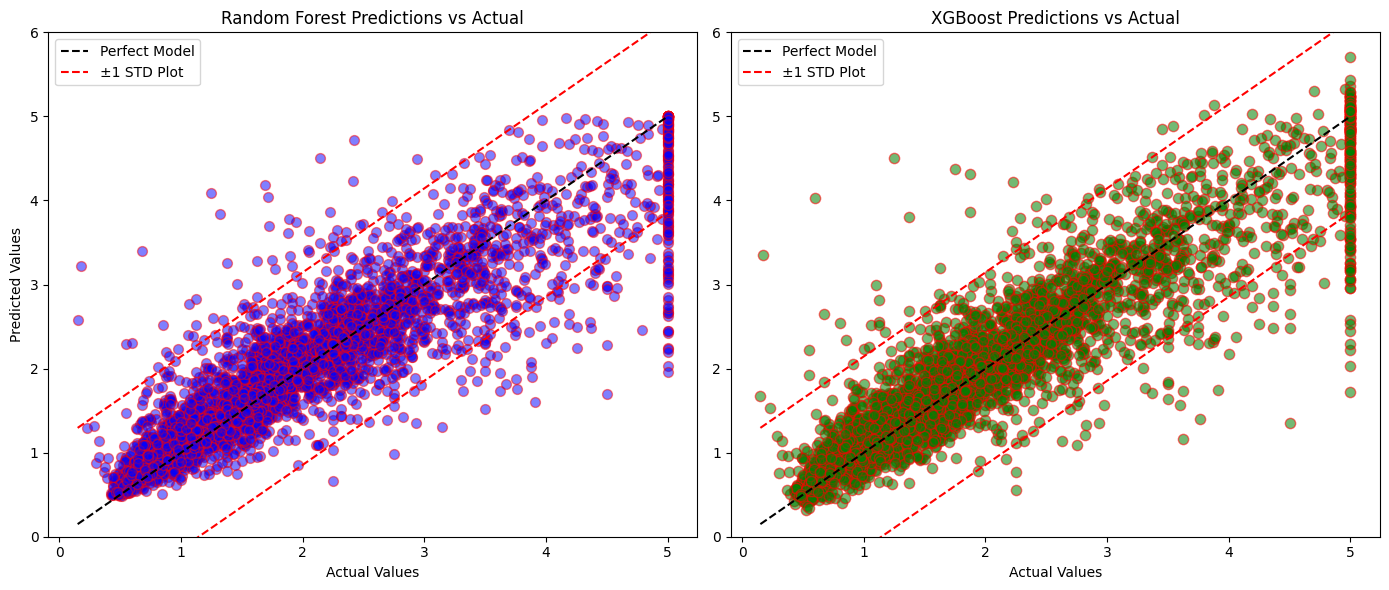

In [31]:
plt.figure(figsize=(14, 6))

#Plot for RandomForest
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, color='blue', ec='red', s=50, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min()-1*std_y, y_test.max()-1*std_y], 'r--', label='±1 STD Plot')
plt.plot([y_test.min(), y_test.max()], [y_test.min()+1*std_y, y_test.max()+1*std_y], 'r--')
plt.ylim(0, 6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

# Plot for XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, color='green', ec='r', s=55, alpha=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label = 'Perfect Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min()-1*std_y, y_test.max()-1*std_y], 'r--', label = '±1 STD Plot')
plt.plot([y_test.min(), y_test.max()], [y_test.min()+1*std_y, y_test.max()+1*std_y], 'r--')
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()